# Lucy's Linear Regression Project

# Linear Regression - Python using Scikit-Learn

Aim

Build a machine learning model to predict the housing price in Boston area. 

Project Overview

I am hired by a real estate company to help them in their business goals. The company wants me to predict the housing prices in Boston area. Based on the community and safety issues, some areas are in demand. The company is interested in some kind of automated way of suggesting the price of a house based on its features.<br>

I am given a dataset that contain features such as crime rate by town, proportion of residential land, nitric oxide concentration, age of the house, property tax so on.... <br>

I are happy to help because I got a job to do!<br>

Data

I am provided the 'Boston Housing Dataset'

Details of the full list of features is given below:

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per USD 10,000
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000's

My Thoughts

When I look at the dataset, I think that the linear regression is a good model to work with in this type of problem because: 

1. Linear regression models are used to show or predict the relationship between a dependent variable and independent variables.

2. Regression analysis is commonly used in research as it establishes that a correlation exists between variables.<br>

# My 7-Step approach

## 1. Import the libraries

The libraries below are imported for Data Analysis and Visualization 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load the dataset(Booston Housing Dataset)

In [6]:
# Related to scikit learn, Python machine learning module 
# to work with the built-in datasets
from sklearn import datasets 

**Let's load the built-in housing price dataset, "boston" into "bh"**

In [7]:
bh = datasets.load_boston()

**boston dataset is essentially a dictionary, let's check its keys**

In [8]:
bh.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

**The key shows that the dataset contains data, target which is the price, feature_names are the columns and DESCR which is the description on the data**

In [41]:
print(bh['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [42]:
bh.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## 3. Data Analysis and Visualization
**It is very important to know the data, let's try to update the data and see how the data look like.**<br>

#### 1. Pandas Library
**Use pandas dataframe with features as column's name and also add target as another column, price.** 

In [43]:
df=pd.DataFrame(data=bh.data,columns=bh.feature_names)
df['price']=bh.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's get some information on the data, using info()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


Let's have a quick view on some of the statistical information of our dataset 

In [45]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### 2. Matplot Library
**This library can be used for some exploratory data analysis.**<br>
A histogram can be used to see how the price is distributed!

Text(0, 0.5, 'count')

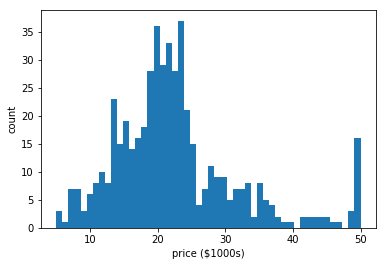

In [46]:
# Housing price (target) histogram 
#plt.figure(figsize=(4, 3))
plt.hist(df['price'], bins=50)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
#plt.tight_layout()

Analysing the histogram, most of the prices are in 20's. Notice that, the average price is around ~ 22K. There are some houses in 50's as well. <br>

#### 3.Seaborn Library
**Seaborn's pairplot function is a good option to explore the data a little more.** <br>
Although all the features can be ploted at once but the pairplot would be very crowded.I have plotted some important features to see how they are related to each other!<br>

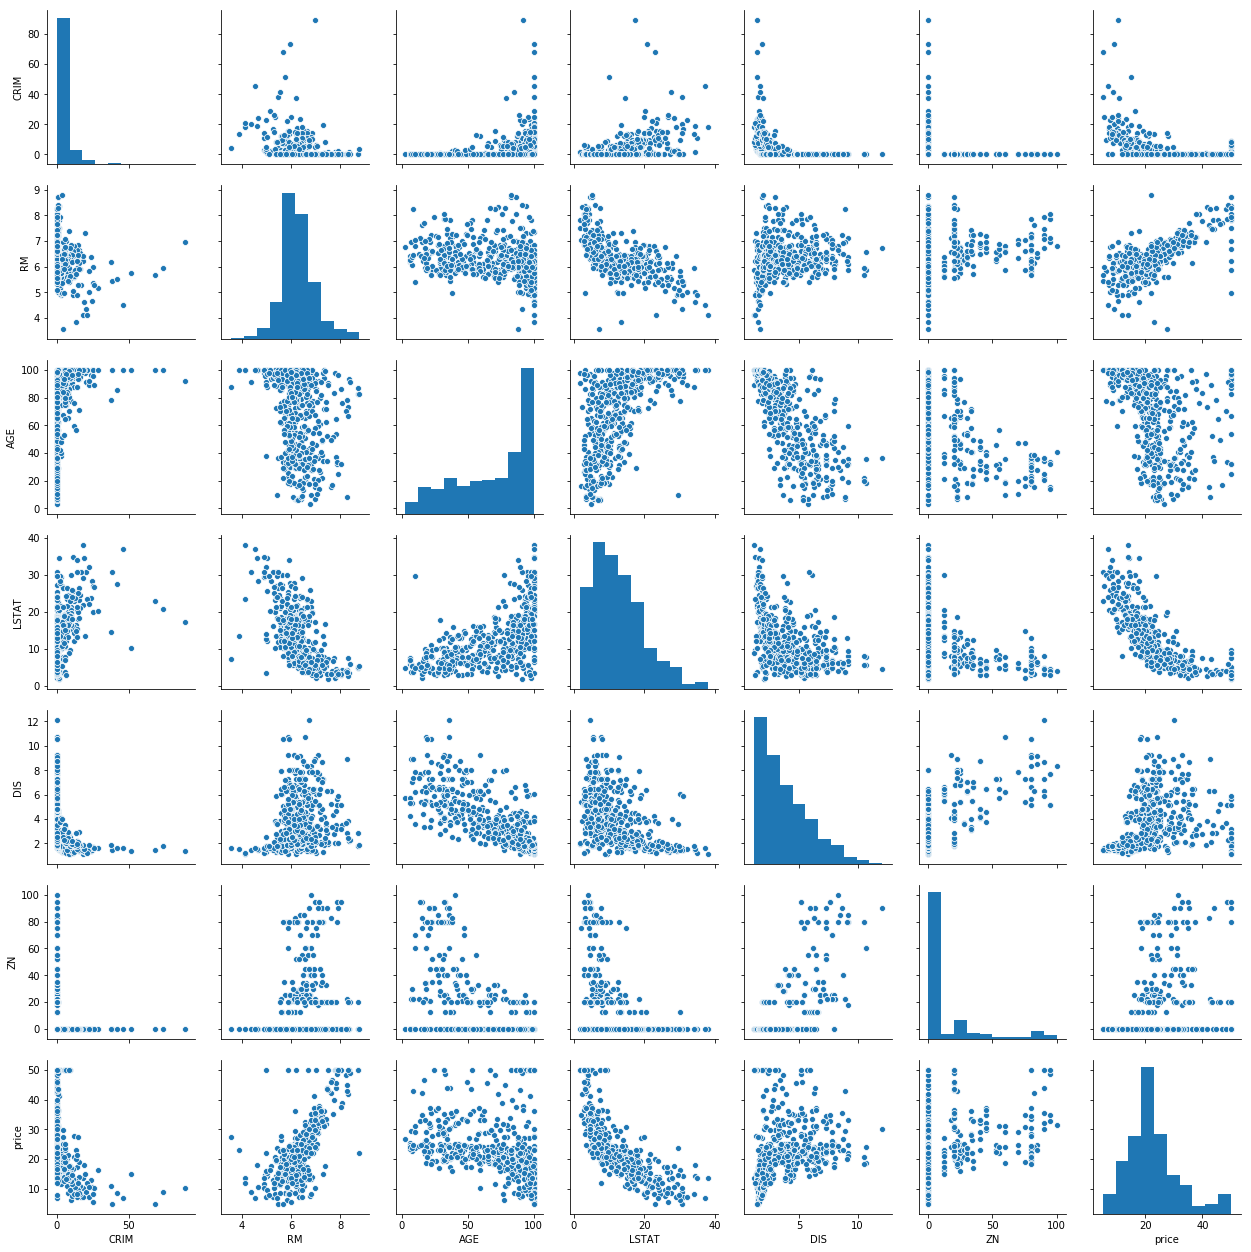

In [19]:
# Crime, No of rooms, Age of the house,Lower status of the population, weighted distance,zone, Price
sns.pairplot(df[['CRIM','RM','AGE','LSTAT','DIS','ZN','price']]) 
#sns.pairplot(df) # in case you want to plot whole dataset!

**Seaborn's heatmap function is used to evaluate correlation between features.** <br>
Taking a quick look on the last row, price vs selected features, we see some trends. Let's see how the heatmap looks like for the selected features!<br><br><br>

In [12]:
# Let's plot correlation for the whole dataframe 
#df.corr()
#sns.heatmap(df.corr())

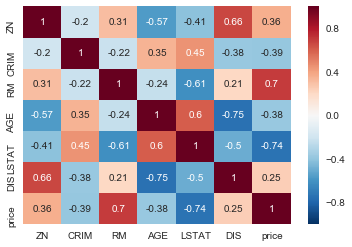

In [13]:
sns.heatmap(df[['ZN','CRIM','RM','AGE','LSTAT','DIS','price']].corr()
            , annot=True)

So, every column is perfectly correlated to itself along the diagonal!
I see +ve and -ve correlation between price and other features. No of rooms have the highest value for price, that make sense, more the rooms are, higher the price is where as older the house is, lower the price you can expect!<br><br>

## 4. Machine learning - Creating and Traing the model

The first thing is to separate the data into:<br>
* X that will contain the selected features
* y will be the target values, in this case price of the house.



In [23]:
X = df[['ZN','CRIM','RM','AGE','LSTAT','DIS']]
y = df['price']

### 1. Linear Regression Model Train Test Split

Now the have features in X and target (price) in y. <br>
Next step is to split the data into a training set (`X_train` & `y_train`) and a testing set (`X_test` & `y_test`). <br>
We will train our model on the training dataset in `X_train` & `y_train` and then use the test dataset `X_test` & `y_test` to evaluate the model.<br>
`Scikit-learn` already has a method `train_test_split`, let's import this built-in method and do the split.<br>
I will pass the `test train data` to `train_test_split` and tell the `test_size`, which is the % of the dataset that I want in the `test data`. <br>
!<br>
Let's leave the standard `test_size = 0.33` and `random_state` at the moment. 
* *For the same data, the random_state = some number will make sure that you are getting same split if you pass the same number. if you pass the same number as mine, you will get the same results for the same data. If you pass a different random_state, you may not get the same results but it does not mean your results are not correct!

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [29]:
# let's check the head of X_train, just for a quick look
X_train.head()

,ZN,CRIM,RM,AGE,LSTAT,DIS
178,0.0,0.06642,6.860,74.4,6.92,2.9153
447,0.0,9.92485,6.251,96.6,16.44,2.1980
445,0.0,10.67180,6.459,94.8,23.98,1.9879
359,0.0,4.26131,6.112,81.3,12.67,2.5091
281,20.0,0.03705,6.968,37.2,4.59,5.2447


### 2. Creating and Training the Model
<br>
Now we have`train (X_train, y_train)` and `test (X_test, y_test)datasets`, Let's create the model.**<br>

First thing first,linear regression model to needed to train on our dataset! so import linear_model` family from the `sklearn so that it's member `LinearRegression`can be used for my data. <br> <br>

In [30]:
#LinearRegression model is a part of linear_model
from sklearn import linear_model

then create an instance for the LinerRegression model

In [31]:
lm = linear_model.LinearRegression()

We have create an instance `lm` (LinearRegression object) to use. <br>
If you write `lm.` and press tab in the code cell, you will find the available options, we want to use `fit()` at the moment to train the model.

Training the model on our train dataset

In [32]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The output above,shows that the `LinearRegression` model has been trained on the provided data to the model!<br>

## 5. Model Evaluation
The model is trained, I need to evaluate them. The model can be evaluated by checking it's coefficients and how they can be interpreted.

In [33]:
# print the intercept
# The intercept (often labeled the constant) is the expected mean value of Y when all X=0.
print(lm.intercept_)

11.287823727868377


Coefficients relates each feature in the dataset, each feature will have a separate coefficient!<br>

In [34]:
# Let's grab the coefficients from the model 
lm.coef_

array([ 0.06266351, -0.12634129,  3.85449278, -0.00772815, -0.69962672,
       -1.07242786])

**Optional**<br>
I can create a dataframe using columns from `X` as `index` and values of the coefficients in a new column `'Coefficient'`. Its organized and look better!

In [35]:
# Our columns are
X.columns
#X_train.columns

Index(['ZN', 'CRIM', 'RM', 'AGE', 'LSTAT', 'DIS'], dtype='object')

In [23]:
coeffs = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeffs

,Coefficient
ZN,0.062560
CRIM,-0.123729
RM,3.839684
AGE,-0.007609
LSTAT,-0.702721
DIS,-1.069469


**Analysis based on coefficients.**<br>
Let's take RM = 3.839684:<br>
* This suggest, if we keep all other coefficients constant, a one unit increase in the RM is associated with an increase of 3.839684 in the price. <br>
* The same is for other related coefficients. e.g. the Crime rate, age etc decreases the price according to their coefficients, keeping all other constants.  <br>

## Predictions from our Model
Its important to know how well the model is doing!<br>

My model has never seen `X_test`, let's provide test data "`X_test`" to the created model and see what the predictions are. Once Ie get the predictions from the model, I can compare them with what I have in our `y_test`. <br>

In [36]:
# Getting predictions from the model 
predictions = lm.predict(X_test)
#predictions

I already know the price of all homes with features in `X_test`, which is in `y_test`, let's plot `y_test` and predictions, scatter plot is a good option!

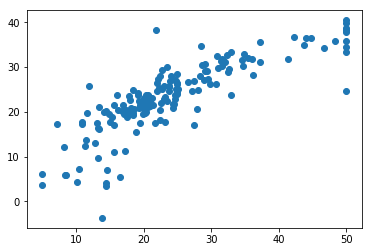

In [38]:
plt.scatter(y_test,predictions)

Residual Histogram can tell us how much the predicted value differ from the actual value in `y_test`. We can simple do the subtraction `y_test - predictions` for this plot.

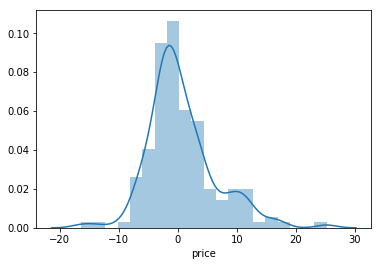

In [40]:
#Residual Histogram
sns.distplot(y_test-predictions)#,bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems. All of these are **loss functions**, because we want to minimize them.<br>

*Consider, ${y}$ is a vector of `n` predictions generated from a sample of `n` data points on all variables, and 
$\hat{y}$ is the vector of observed values (target values) of the variable being predicted.<br>*

**[Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)** (MAE) is the mean of the absolute value of the errors: <br>
it's the average error!

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i  |$$

**[Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)** (MSE) is the mean of the squared errors:<br>
**MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**[Root Mean Squared Error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)** (RMSE) is the square root of the mean of the squared errors:<br>
**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units. <br><br>The root-mean-squared error (**RMSE**) **or** root-mean-square deviation (**RMSD**), is a frequently used measure of the differences between values predicted by a model or an estimator and the values actually observed. The RMSD represents the sample standard deviation of the differences between predicted values and observed values.

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
<br><br><br>
Calculate MAE, MSE and RMSE for the model. <br>Pass the y_test and predictions to the respective method!<br>


In [27]:
#Regression Evaluation Metrics
from sklearn import metrics

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.18493408141
MSE: 34.1244120182
RMSE: 5.84161039596


Done with my first machine learning project using python

In [47]:
import sys

In [48]:
sys.prefix

'C:\\Users\\User\\Anaconda3'

In [58]:
conda install -c conda-forge rise

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
conda install -c conda-forge jupyter_nbextensions_configurator

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
